<a href="https://colab.research.google.com/github/mrcroney/amini-technical-assignment/blob/main/health_registry_eda_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Profiling the data
This notebook is an exploratory data analysis of a single CSV file representative of National Health Facility Registry.

**Objective** - This CSV file will be fully profiled, cleaned and documented.


In [392]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [393]:
# Import the CSV file into the notebook and assign it as the data frame
csv_file_path = '/content/health_registry.csv'
df = pd.read_csv(csv_file_path)

# Check to see the number of rows and columns
df.shape

(13013, 9)

In [394]:
# Check the names of the columns

In [395]:
print(f"Successfully loaded {csv_file_path}")
display(df.head())

Successfully loaded /content/health_registry.csv


,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
0,HF-0000,Burgess-Ingram Medical Center,Community Health Ctr.,250 beds,St.Lucy,04-01-21,08 Mar 2024,"13.08576, -58.75331",NaN
1,033477,Collins Inc,Hosp.,NaN,St.Peter,28 Mar 2024,17-04-23,POINT(-58.84001 12.87196),Good
2,#2,Butler-Leon Clinic (St.),Hospital,117Beds,St. James Parish,2016-02-18,30/12/22,"-58.82307, 13.00952",Good
3,2,Butler-Leon Clinic (St.),Hospital,117Beds,St. James Parish,2016-02-18,30/12/22,"-58.82307, 13.00952",Good
4,HF-0003,"Powell, Morales and Butler Infirmary",Health Ctr.,179 capacity,ST. LUCY,November 21 2020,07-03-24,"12.77293, -59.04279",Follow-up 2023


Looking at the first 5 rows. Immediately we can see:

1.   There is no consistent naming convention used for the data values. (In the facility_id series we see values like "HF-0000", "#2", "2", then back to something like the first value, "HF-0003".)

2.   There are rows that are almost duplicates, just different facility_id naming conventions. (index 2 and 3)

3. There are missing values. (capacity value in index 1)

4. Inconsistent date formats. (licence_issue_date and inspection_date)

In [396]:
# Checking for incorrect data types
df.dtypes

,0
facility_id,object
facility_name,object
facility_type,object
capacity,object
region,object
licence_issue_date,object
inspection_date,object
gps_location,object
remarks,object


In [397]:
# Obtaining an overview of the dataset
df.describe()

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,9305,12989,11015,10361,12980,12990,13002,10721,10080
unique,7356,10233,11,2904,116,7980,7509,8282,8
top,???,--,Community Health Centre,unknown,Christ Church,32/13/99,32/13/99,somewhere,Reinspection due
freq,16,14,1060,1403,363,124,135,22,1503


*   The dataset has 13,013 rows and 9 columns.
*   Every column has a count < 13,013 so we know that we are missing values in each column.
*   For the facility_id column, unique < count therefore we also have duplicate id values, these should all be unique.

Now we explore the missingness in more detail.

In [398]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage (%)': missing_percentage})

display(missing_df.sort_values(by='Missing Percentage (%)', ascending=False))

,Missing Values,Missing Percentage (%)
facility_id,3708,28.494582
remarks,2933,22.538999
capacity,2652,20.379620
gps_location,2292,17.613156
facility_type,1998,15.353877
region,33,0.253593
facility_name,24,0.184431
licence_issue_date,23,0.176746
inspection_date,11,0.084531


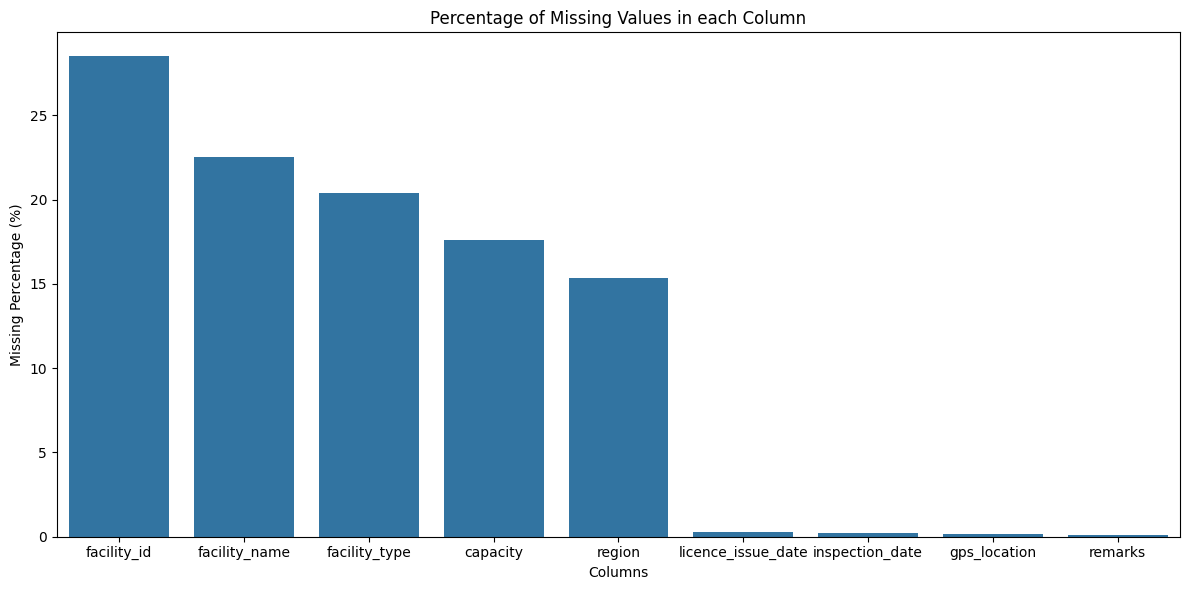

In [399]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percentage (%)', data=missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))
plt.title('Percentage of Missing Values in each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

The graph shows us that facility_id has the most missing values at 28.5%, followed by facility_name, facility_type and so on.

In [400]:
duplicate_rows = df[df.duplicated()]

print(f"Total number of duplicate rows (excluding the first occurrence): {duplicate_rows.shape[0]}")
print(f"Percentage of duplicate rows: {(duplicate_rows.shape[0] / len(df)) * 100:.2f}%")

if not duplicate_rows.empty:
    print("\nFirst 5 duplicate rows:\n")
    display(duplicate_rows.head())

Total number of duplicate rows (excluding the first occurrence): 1672
Percentage of duplicate rows: 12.85%

First 5 duplicate rows:



,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
5,HF-0003,"Powell, Morales and Butler Infirmary",Health Ctr.,179 capacity,ST. LUCY,November 21 2020,07-03-24,"12.77293, -59.04279",Follow-up 2023
8,NaN,May and Sons Medical Center (St),Polyclinic 🏥,ten beds,St Peter,20160217,2018-01-01,13°2′6″N 59°0′38″W,Follow-up 2023
24,2ba130,Brown PLC Polyclinic,Polyclinic 🏥,NaN,St James,July 07 2016,28 May 2024,12°43′45″N 59°17′10″W,Reinspection due
27,022,Baker-Taylor Hosp.,NaN,NaN,St. Joseph,02/04/18,20190602,"-59.24115, 12.70994",NaN
37,029,"Bentley, Scott and Graves Clinic",NaN,NaN,St. Joseph,22 Dec 2019,20191030,"13.24629, -58.98848",-


In [401]:
unique_counts = df.nunique()
total_counts = df.count()
duplicate_value_columns = unique_counts[unique_counts < total_counts]

print("Columns with duplicate values (excluding NaNs, where unique count is less than total count):\n")

duplicate_summary = pd.DataFrame(columns=['Column', 'Unique Values', 'Total Non-Null Values', 'Duplicate Values (Count)','Duplicate Values (%)'])

for col in df.columns:
    if df[col].count() > 0: # Only process non-empty columns
        total_non_null = df[col].count()
        unique_val_count = df[col].nunique()

        if unique_val_count < total_non_null:
            duplicate_val_count = total_non_null - unique_val_count
            duplicate_percent = (duplicate_val_count / total_non_null) * 100
            duplicate_summary = pd.concat([duplicate_summary, pd.DataFrame([{'Column': col,
                                                             'Unique Values': unique_val_count,
                                                             'Total Non-Null Values': total_non_null,
                                                             'Duplicate Values (Count)': duplicate_val_count,
                                                             'Duplicate Values (%)': duplicate_percent.round(2)}])], ignore_index=True)

display(duplicate_summary.sort_values(by='Duplicate Values (%)', ascending=False))

Columns with duplicate values (excluding NaNs, where unique count is less than total count):



/tmp/ipython-input-3991091506.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  duplicate_summary = pd.concat([duplicate_summary, pd.DataFrame([{'Column': col,


,Column,Unique Values,Total Non-Null Values,Duplicate Values (Count),Duplicate Values (%)
8,remarks,8,10080,10072,99.92
2,facility_type,11,11015,11004,99.90
4,region,116,12980,12864,99.11
3,capacity,2904,10361,7457,71.97
6,inspection_date,7509,13002,5493,42.25
5,licence_issue_date,7980,12990,5010,38.57
7,gps_location,8282,10721,2439,22.75
1,facility_name,10233,12989,2756,21.22
0,facility_id,7356,9305,1949,20.95


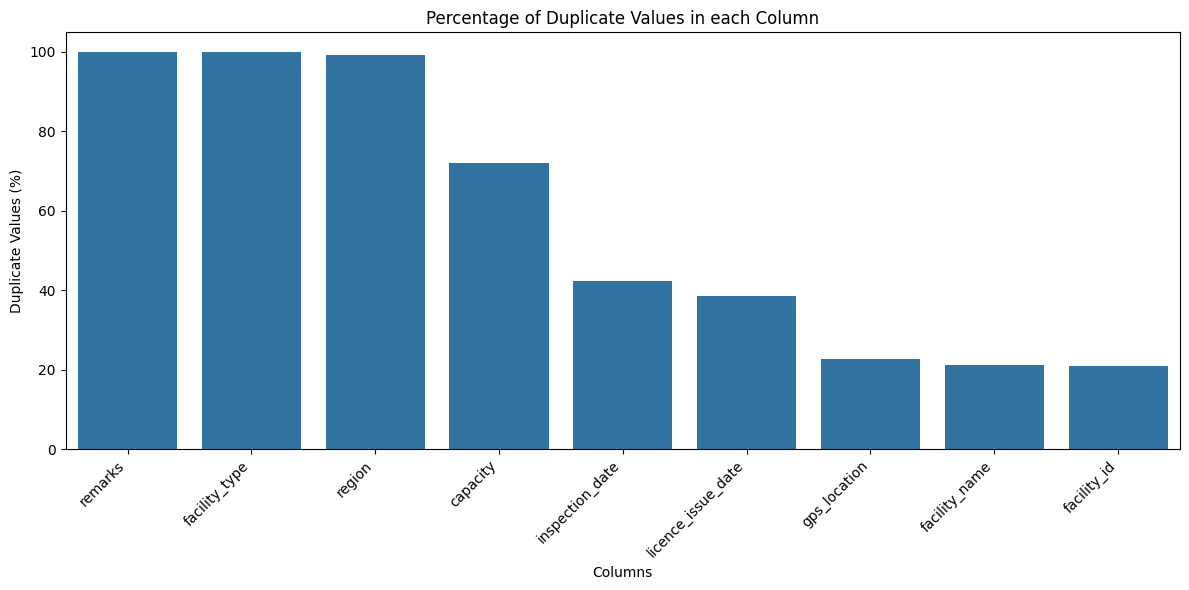

In [402]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Duplicate Values (%)', data=duplicate_summary.sort_values(by='Duplicate Values (%)', ascending=False))
plt.title('Percentage of Duplicate Values in each Column')
plt.xlabel('Columns')
plt.ylabel('Duplicate Values (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here we see the spread of duplicate values. Columns such as remarks and facility_type have the most duplicate values as only certain values should be going into those columns.


---

On the other hand, facility_id, facility_name and gps_location have the least amount of duplicate values. In reality however, these columns should have practically no duplicate values at all. This has probably occured to due to the fact that the csv file has been complied from several different sources. The same health facility was probably listed in different sources that were used.



# Exploratory Data Analysis - Cleaning the data

To clean the dataset we look to accomplish the following goals:

*   Remove duplicate rows
*   Standardize values in `facility_id`,
*   



Prior to removing via pandas remove duplicates function.

In [452]:
df.shape

(13013, 9)

In [453]:
df.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,9305,12989,11015,10361,12980,12990,13002,10721,10080
unique,7356,10233,11,2904,116,7980,7509,8282,8
top,???,--,Community Health Centre,unknown,Christ Church,32/13/99,32/13/99,somewhere,Reinspection due
freq,16,14,1060,1403,363,124,135,22,1503


In [454]:
# Creating a second dataframe to use cleaning techniques on
df_clean = df.copy()

# Setting the new dataframe which is in the process of being cleaned, to the original dataframe but with dropped exact duplicates
df_clean = df.drop_duplicates()

In [455]:
print(f'{df_clean.shape}')
print("The dataframe now has 11,341 rows as opposed to 13,013 rows like before, exact duplicates are gone")

(11341, 9)
The dataframe now has 11,341 rows as opposed to 13,013 rows like before, exact duplicates are gone


In [456]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,8140,11318,9586,9043,11309,11318,11330,9346,8803
unique,7356,10233,11,2904,116,7980,7509,8282,8
top,???,--,Community Health Centre,unknown,Christ Church,32/13/99,32/13/99,somewhere,Reinspection due
freq,15,14,909,1208,315,109,121,22,1321


The cleaned dataset now has 11,341 rows but `facility_id` has a count of 8140 with only 7356 of them being unique. All `facility_id` values should be unique so this must mean that there are still duplicated values, just that the entire row is not a duplicate. We need to get rid of these next.

In [457]:
df_clean = df_clean.drop_duplicates(subset=['facility_id'], keep='first')
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,7356,7355,6191,5851,7355,7356,7357,6109,5711
unique,7356,7117,11,2476,98,6071,5817,5938,7
top,###,Gonzalez PLC,Hospital,unknown,Christ Church,32/13/99,32/13/99,"12.87732, -58.77145",Reinspection due
freq,1,3,592,774,214,68,83,2,864


Now all duplicates of `facility_id` are gone and the first occurance of each was kept. We now look at `facility_name` and see that it has duplicates. This means that some facilities are still duplicated in the dataset. We see that Gonzalez PLC occurs 3 different times in the dataset, each time with a different facility_id. We will now remove duplicate `facility_name` rows while keeping the first like we did with `facility_id`.

In [458]:
df_clean = df_clean.drop_duplicates(subset=['facility_name'], keep='first')
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,7117,7117,5987,5651,7117,7117,7118,5919,5526
unique,7117,7117,11,2467,81,6039,5794,5902,7
top,???,Gonzalez-Collins Hospital (St.John),Hospital,unknown,Christ Church,32/13/99,32/13/99,POINT(-59.15696 12.95793),Reinspection due
freq,1,1,573,750,206,68,79,2,831


In [459]:
df_clean.shape

(7118, 9)

We have 7117 unique `facility_id` values now but 7118 rows which means one row does not have a value in that column. Let's remove it.

In [460]:
df_clean = df_clean.dropna(subset=['facility_id'])
df_clean.shape

(7117, 9)

Row has been successfully removed, so our first column `facility_id` is now full with unique values. Let's look at describe() again.

In [461]:
df_clean.describe()

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,7117,7116,5986,5650,7116,7116,7117,5918,5525
unique,7117,7116,11,2467,81,6038,5793,5901,7
top,???,Gonzalez-Collins Hospital (St.John),Hospital,unknown,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due
freq,1,1,573,750,206,68,79,2,831


One of our rows has a `facility_id` but that facility has no name, let's just drop that row also.

In [462]:
df_clean = df_clean.dropna(subset=['facility_name'])
df_clean.shape

(7116, 9)

In [463]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,7116,7116,5986,5650,7116,7116,7116,5917,5525
unique,7116,7116,11,2467,81,6038,5792,5900,7
top,#9999,Gonzalez-Collins Hospital (St.John),Hospital,unknown,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due
freq,1,1,573,750,206,68,79,2,831


Ok now we have 7116 rows which all have unique `facility_id` and `facility_name` and no missing values. Moving onto `facility_type`, let's analyze the 11 different data values that can occur in that column.

In [464]:
facility_type_count = df_clean['facility_type'].value_counts()
print(facility_type_count)

facility_type
Hospital                   573
Community Health Ctr.      571
Health Ctr.                556
CHC                        554
Community Health Centre    554
Clinic                     544
Hosp.                      543
Polyclinic 🏥               540
Clinic🌡️                   521
Polyclinic                 518
Health Centre              512
Name: count, dtype: int64


We can aggregate these into a couple of data values.


*   "Hospital" and "Hosp." are the same and should be summed as "hospital"
*   "Community Health Ctr.", "Health Ctr.", "CHC", "Community Health Centre", "Health Centre" summed as "community health centre"
*   "Clinic" and "Clinic🌡️" summed as "clinic"
*   "Polyclinic 🏥" and "Polyclinic" summed as "polyclinic"

So that we have just 4 unique values in this column, "hospital", "community health centre", "clinic", "polyclinic".



In [465]:
facility_type_mapping = {
    'Hospital': 'hospital',
    'Hosp.': 'hospital',
    'Community Health Ctr.': 'community health centre',
    'Health Ctr.': 'community health centre',
    'CHC': 'community health centre',
    'Community Health Centre': 'community health centre',
    'Health Centre': 'community health centre',
    'Clinic': 'clinic',
    'Clinic🌡️': 'clinic',
    'Polyclinic 🏥': 'polyclinic',
    'Polyclinic': 'polyclinic'
}

print(facility_type_mapping)

{'Hospital': 'hospital', 'Hosp.': 'hospital', 'Community Health Ctr.': 'community health centre', 'Health Ctr.': 'community health centre', 'CHC': 'community health centre', 'Community Health Centre': 'community health centre', 'Health Centre': 'community health centre', 'Clinic': 'clinic', 'Clinic🌡️': 'clinic', 'Polyclinic 🏥': 'polyclinic', 'Polyclinic': 'polyclinic'}


In [466]:
df_clean['facility_type'] = df_clean['facility_type'].replace(facility_type_mapping)
print(df_clean['facility_type'].value_counts())

facility_type
community health centre    2747
hospital                   1116
clinic                     1065
polyclinic                 1058
Name: count, dtype: int64


In [467]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks
count,7116,7116,5986,5650,7116,7116,7116,5917,5525
unique,7116,7116,4,2467,81,6038,5792,5900,7
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due
freq,1,1,2747,750,206,68,79,2,831


`facility_type` is now properly cleaned and we see that community health centre is the most frequent health facility in our dataset with 2747 entries.

Let's look at `capacity` now.

In [468]:
capacity_count = df_clean['capacity'].value_counts()
print(capacity_count)



capacity
unknown     750
ten beds    697
220 cots      7
300Beds       6
383 bed       6
           ... 
138Beds       1
295           1
42 bed        1
99 cots       1
408           1
Name: count, Length: 2467, dtype: int64


`capacity` is very messy with 2467 unique values, we see that some of these values include strings like 'beds', 'cots', 'bed' along with a number. Let's create a new column called `capacity_type` which holds these strings, while keeping just the numbers in `capacity`.

In [469]:
# Start by converting `capacity` to string type
df_clean['capacity'] = df_clean['capacity'].astype(str)

# Use regular expression to extract numbers and letters into new columns
# (\d+) extracts one or more digits
# (\D+) extracts one or more non-digits
# The '?' makes the preceding group optional, handling rows with only one type of data
# Corrected regex: Removed extra backslashes that were causing no matches
extracted_data = df_clean['capacity'].str.extract(r'(?P<Numeric_Data>\d+)?(?P<Letter_Data>\D+)?')

# Assign the extracted data to new columns in the original DataFrame
df_clean['capacity_count'] = extracted_data['Numeric_Data']
df_clean['capacity_type'] = extracted_data['Letter_Data']


In [470]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks,capacity_count,capacity_type
count,7116,7116,5986,7116,7116,7116,7116,5917,5525,4203,6512
unique,7116,7116,4,2468,81,6038,5792,5900,7,500,9
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,nan,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due,468,nan
freq,1,1,2747,1466,206,68,79,2,831,17,1466


In [471]:
capacity_type_count = df_clean['capacity_type'].value_counts()
print(capacity_type_count)

capacity_type
nan          1466
unknown       750
ten beds      697
 capacity     618
 beds         609
Beds          604
 cots         602
 bed          586
 patients     580
Name: count, dtype: int64


We see that `capacity_type` contains only letter data, now we need to aggregate this into logical sums, being careful of the whitespaces.

*   "nan", "unknown", "capacity", "patients" summed as "unknown"
*   "ten beds", "beds", "Beds", "bed" summed as "bed"
*   "cots" as "cot"

So that we have just 3 unique values in this column, "unknown", "bed" and "cot".(Also set all nulls to "unknown")

But before we apply the dictionary, we should set `capacity_count` to 10 wherever `capacity_type` is "ten beds" as those rows are probably null right now since the data was written as "ten" instead of "10".

In [472]:
df_clean.loc[df_clean['capacity_type'] == 'ten beds', 'capacity_count'] = 10

In [473]:
df_clean['capacity_count'].describe(include='object')

,capacity_count
count,4900
unique,501
top,10
freq,697


`capacity_count` now has 4900 values instead of 4203 like before. 697 of those null values were supposed to be 10 and 10 is also the mode of the column so it's a good thing we spotted that. Losing the mode of the dataset would significantly impact future analysis.

In [474]:
capacity_type_mapping = {
    'nan': 'unknown',
    'unknown': 'unknown',
    ' capacity': 'unknown',
    ' patients': 'unknown',
    'ten beds': 'bed',
    ' beds': 'bed',
    'Beds': 'bed',
    ' bed': 'bed',
    ' cots': 'cot'
}

print(capacity_type_mapping)

{'nan': 'unknown', 'unknown': 'unknown', ' capacity': 'unknown', ' patients': 'unknown', 'ten beds': 'bed', ' beds': 'bed', 'Beds': 'bed', ' bed': 'bed', ' cots': 'cot'}


In [475]:
df_clean['capacity_type'] = df_clean['capacity_type'].replace(capacity_type_mapping)
print(df_clean['capacity_type'].value_counts())

capacity_type
unknown    3414
bed        2496
cot         602
Name: count, dtype: int64


In [476]:
df_clean['capacity_type'] = df_clean['capacity_type'].fillna('unknown')

In [477]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity,region,licence_issue_date,inspection_date,gps_location,remarks,capacity_count,capacity_type
count,7116,7116,5986,7116,7116,7116,7116,5917,5525,4900,7116
unique,7116,7116,4,2468,81,6038,5792,5900,7,501,3
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,nan,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due,10,unknown
freq,1,1,2747,1466,206,68,79,2,831,697,4018


All done, let's get rid of the original `capacity` column and reorganize the dataframe so that our two new columns replace it.

In [478]:
df_clean = df_clean.drop(columns=['capacity'])

In [479]:
df_clean_new_order = ['facility_id', 'facility_name', 'facility_type', 'capacity_type',
                      'capacity_count', 'region','licence_issue_date', 'inspection_date', 'gps_location',
                      'remarks',
                      ]
df_clean = df_clean[df_clean_new_order]

In [480]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,licence_issue_date,inspection_date,gps_location,remarks
count,7116,7116,5986,7116,4900,7116,7116,7116,5917,5525
unique,7116,7116,4,3,501,81,6038,5792,5900,7
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,10,Christ Church,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due
freq,1,1,2747,4018,697,206,68,79,2,831


Now we look at the region column.

In [481]:
region_count = df_clean['region'].value_counts()
print(region_count)

region
Christ Church      206
st. joseph         137
ST. GEORGE         134
ST. JOSEPH         134
St.Joseph          132
                  ... 
ST. JOSEPH           1
ST.JOHN              1
ST ANDREW            1
CHRISTCHURCH         1
ST. LUCY PARISH      1
Name: count, Length: 81, dtype: int64


Looks like case is one of the issues here which is giving us unique values, let's do the following:


*   Set values to title case
*   Strip whitespace
*   Remove the word 'Parish'



In [482]:
df_clean['region'] = df_clean['region'].str.title()
df_clean['region'] = df_clean['region'].str.replace('Parish', '')
df_clean['region'] = df_clean['region'].str.strip()


region_count = df_clean['region'].value_counts()
print(region_count)

region
Christ Church    607
St. Joseph       556
St. James        537
St. George       532
St. Michael      526
St. Lucy         505
St. John         503
St. Peter        498
St. Andrew       467
St.Joseph        132
St.John          124
Christchurch     120
St.James         116
St.George        113
St.Lucy          105
St.Peter         105
St.Michael       105
St.Andrew        102
St Joseph         89
St Lucy           87
St George         86
Retep .Ts         85
Ycul .Ts          84
Egroeg .Ts        83
Nhoj .Ts          82
St James          82
St Andrew         81
Hcruhc Tsirhc     80
Werdna .Ts        79
Leahcim .Ts       78
St Peter          77
St John           76
St Michael        74
Semaj .Ts         71
Hpesoj .Ts        69
Name: count, dtype: int64


Now we use another dictionary to change aggregate values logically as we see some of these values have been reversed.

There should be only 12 unique values here, the 11 parishes and perhaps some 'unknown' values.

The parishes are:

 Christ Church, St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Philip, St. Thomas.

In [483]:
region_mapping = {
    'St.Joseph': 'St. Jospeh',
    'St.John': 'St. John',
    'Christchurch': 'Christ Church',
    'St.James': 'St. James',
    'St.George': 'St. George ',
    'St.Michael': 'St. Michael',
    'St.Peter': 'St. Peter',
    'St.Andrew': 'St. Andrew',
    'St.Philip': 'St. Philip',
    'St.Lucy': 'St. Lucy',
    'St.Thomas': 'St. Thomas',
    'St.Joseph': 'St. Jospeh',
    'St.  John': 'St. John',
    'St.  Michael': 'St. Michael',
    'St.  James': 'St. James',
    'St.  Peter': 'St. Peter',
    'St.  Andrew': 'St. Andrew',
    'St Joseph': 'St. Jospeh',
    'St Lucy': 'St. Lucy',
    'St George': 'St. George',
    'Retep .Ts': 'St. Peter',
    'Ycul .Ts' : 'St. Lucy',
    'Egroeg .Ts' : 'St. George',
    'Nhoj .Ts' : 'St. John',
    'St James' : 'St. James',
    'St Peter' : 'St. Peter',
    'St Andrew' : 'St. Andrew',
    'Hcruhc Tsirhc' : 'Christ Church',
    'Werdna .Ts' : 'St. Andrew',
    'Leahcim .Ts' : 'St. Michael',
    'St John' : 'St. John',
    'St Michael' : 'St. Michael',
    'Semaj .Ts' : 'St. James',
    'Hpesoj .Ts' : 'St. Joseph',
    'St. Joseph' : 'St. Jospeh'
}

print(region_mapping)

{'St.Joseph': 'St. Jospeh', 'St.John': 'St. John', 'Christchurch': 'Christ Church', 'St.James': 'St. James', 'St.George': 'St. George ', 'St.Michael': 'St. Michael', 'St.Peter': 'St. Peter', 'St.Andrew': 'St. Andrew', 'St.Philip': 'St. Philip', 'St.Lucy': 'St. Lucy', 'St.Thomas': 'St. Thomas', 'St.  John': 'St. John', 'St.  Michael': 'St. Michael', 'St.  James': 'St. James', 'St.  Peter': 'St. Peter', 'St.  Andrew': 'St. Andrew', 'St Joseph': 'St. Jospeh', 'St Lucy': 'St. Lucy', 'St George': 'St. George', 'Retep .Ts': 'St. Peter', 'Ycul .Ts': 'St. Lucy', 'Egroeg .Ts': 'St. George', 'Nhoj .Ts': 'St. John', 'St James': 'St. James', 'St Peter': 'St. Peter', 'St Andrew': 'St. Andrew', 'Hcruhc Tsirhc': 'Christ Church', 'Werdna .Ts': 'St. Andrew', 'Leahcim .Ts': 'St. Michael', 'St John': 'St. John', 'St Michael': 'St. Michael', 'Semaj .Ts': 'St. James', 'Hpesoj .Ts': 'St. Joseph', 'St. Joseph': 'St. Jospeh'}


In [484]:
df_clean['region'] = df_clean['region'].replace(region_mapping)
df_clean['region'] = df_clean['region'].str.strip()
print(df_clean['region'].value_counts())

region
St. George       814
Christ Church    807
St. James        806
St. John         785
St. Michael      783
St. Lucy         781
St. Jospeh       777
St. Peter        765
St. Andrew       729
St. Joseph        69
Name: count, dtype: int64


In [485]:
df_clean.describe(include='object')

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,licence_issue_date,inspection_date,gps_location,remarks
count,7116,7116,5986,7116,4900,7116,7116,7116,5917,5525
unique,7116,7116,4,3,501,10,6038,5792,5900,7
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,10,St. George,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due
freq,1,1,2747,4018,697,814,68,79,2,831


`region` is now cleaned, 7116 values are present so we have no nulls. Interestingly, St. Philip and St. Thomas are missing. Perhaps we lost data values of health facilities in these parishes as we were cleaning, or maybe this artificial dataset just did not include these parishes. In the real world we know there will definitely be at least one health centre in each parish.

Now, we move on to the date columns, `licence_issue_date` and `inspection_date`, starting by creating clean date column copies of them.

In [486]:
df_clean['clean_license_issue_date'] = pd.to_datetime(df_clean['licence_issue_date'], errors='coerce', format='mixed')
df_clean['clean_inspection_date'] = pd.to_datetime(df_clean['inspection_date'], errors='coerce', format='mixed')

df_clean.describe(include='all')

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,licence_issue_date,inspection_date,gps_location,remarks,clean_license_issue_date,clean_inspection_date
count,7116,7116,5986,7116,4900.0,7116,7116,7116,5917,5525,7048,7037
unique,7116,7116,4,3,501.0,10,6038,5792,5900,7,NaN,NaN
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,10.0,St. George,32/13/99,32/13/99,-59.13276;13.25329,Reinspection due,NaN,NaN
freq,1,1,2747,4018,697.0,814,68,79,2,831,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03 06:12:40.045402880,2022-01-07 10:02:01.756430336
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2018-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-06 00:00:00,2020-01-04 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-14 12:00:00,2022-01-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 06:00:00,2024-01-10 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-31 00:00:00,2025-12-30 00:00:00


In [487]:
df_clean.head()

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,licence_issue_date,inspection_date,gps_location,remarks,clean_license_issue_date,clean_inspection_date
0,HF-0000,Burgess-Ingram Medical Center,community health centre,bed,250,St. Lucy,04-01-21,08 Mar 2024,"13.08576, -58.75331",NaN,2021-04-01,2024-03-08
1,033477,Collins Inc,hospital,unknown,NaN,St. Peter,28 Mar 2024,17-04-23,POINT(-58.84001 12.87196),Good,2024-03-28,2023-04-17
2,#2,Butler-Leon Clinic (St.),hospital,bed,117,St. James,2016-02-18,30/12/22,"-58.82307, 13.00952",Good,2016-02-18,2022-12-30
4,HF-0003,"Powell, Morales and Butler Infirmary",community health centre,unknown,179,St. Lucy,November 21 2020,07-03-24,"12.77293, -59.04279",Follow-up 2023,2020-11-21,2024-07-03
6,00004,"Williams, Woods and Bradley Polyclinic",hospital,unknown,NaN,St. Andrew,17-04-21,January 31 2024,13°12′43″N 58°51′50″W,NaN,2021-04-17,2024-01-31


Clean date columns look good, let's get rid of the dirty date columns and again re-order. We will now have to pass include='all' into our describe functions if we want to see all of the columns as our new date columns are set to date data types.

In [488]:
df_clean.drop(columns=['licence_issue_date', 'inspection_date'], inplace=True)

In [489]:
df_clean_new_order_2 = ['facility_id', 'facility_name', 'facility_type', 'capacity_type',
       'capacity_count', 'region','clean_license_issue_date',
       'clean_inspection_date',
       'gps_location', 'remarks', ]

In [490]:
df_clean = df_clean[df_clean_new_order_2]

In [491]:
# Renaming now cleaned columns to their old names
df_clean = df_clean.rename(columns={'clean_license_issue_date': 'license_issue_date', 'clean_inspection_date': 'inspection_date'})

In [492]:
df_clean.describe(include='all')

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,license_issue_date,inspection_date,gps_location,remarks
count,7116,7116,5986,7116,4900.0,7116,7048,7037,5917,5525
unique,7116,7116,4,3,501.0,10,NaN,NaN,5900,7
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,10.0,St. George,NaN,NaN,-59.13276;13.25329,Reinspection due
freq,1,1,2747,4018,697.0,814,NaN,NaN,2,831
mean,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03 06:12:40.045402880,2022-01-07 10:02:01.756430336,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2018-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-06 00:00:00,2020-01-04 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-14 12:00:00,2022-01-16 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 06:00:00,2024-01-10 00:00:00,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-31 00:00:00,2025-12-30 00:00:00,NaN,NaN


Now looking at `gps_location`.

In [493]:
gps_location_mapping = {
    '': 'unknown',
}

print(gps_location_mapping)

{'': 'unknown'}


In [494]:
df_clean['gps_location'] = df_clean['gps_location'].replace(gps_location_mapping)
print(df_clean['gps_location'].value_counts())

gps_location
-59.13276;13.25329           2
POINT(-59.00317 12.98074)    2
-58.74176;12.95278           2
-59.22415;12.94578           2
12°48′38″N 59°12′1″W         2
                            ..
13°6′34″N 59°11′2″W          1
-59.04268;13.22250           1
-59.04142;13.21277           1
-59.15839, 12.85489          1
12.99443, -59.00632          1
Name: count, Length: 5900, dtype: int64


Now looking at `remarks`.

In [495]:
remarks_count = df_clean['remarks'].value_counts()
print(remarks_count)

remarks
Reinspection due    831
Good                827
-                   805
Follow-up 2023      803
♥                   789
Needs upgrade       744
                    726
Name: count, dtype: int64


In [496]:
remarks_mapping = {
    '-': 'none',
    '♥': 'Loved it',
    '': 'none',
}

print(remarks_mapping)

{'-': 'none', '♥': 'Loved it', '': 'none'}


In [497]:
df_clean['remarks'] = df_clean['remarks'].replace(remarks_mapping)
print(df_clean['remarks'].value_counts())

remarks
Reinspection due    831
Good                827
none                805
Follow-up 2023      803
Loved it            789
Needs upgrade       744
                    726
Name: count, dtype: int64


Replacing all remaining null values with "unknown", I think it is more useful to represent the data like this for future analysis.

In [498]:
df_clean['facility_type'] = df_clean['facility_type'].fillna('unknown')
df_clean['capacity_count'] = df_clean['capacity_count'].fillna('unknown')
df_clean['license_issue_date'] = df_clean['license_issue_date'].fillna('unknown')
df_clean['inspection_date'] = df_clean['inspection_date'].fillna('unknown')
df_clean['gps_location'] = df_clean['gps_location'].fillna('unknown')
df_clean['remarks'] = df_clean['remarks'].fillna('unknown')

In [501]:
df_clean.describe(include='all')

,facility_id,facility_name,facility_type,capacity_type,capacity_count,region,license_issue_date,inspection_date,gps_location,remarks
count,7116,7116,7116,7116,7116,7116,7116,7116,7116,7116
unique,7116,7116,5,3,502,10,3134,2645,5901,8
top,#9999,Gonzalez-Collins Hospital (St.John),community health centre,unknown,unknown,St. George,unknown,unknown,unknown,unknown
freq,1,1,2747,4018,2216,814,68,79,1199,1591


Tried the same technique with `gps_location`, seemed to give the same result, not sure what to do there honestly. Unsure about removing duplicates here, it is possible that some of these facilities are built on the same property.

Finished cleaning the dataset at this point. Exporting `df_clean` as `cleaned_health_registry.csv`.

In [502]:
df_clean.to_csv('cleaned_health_registry.csv')